### Plotting 3D surfaces
#### Plot surface from an analytic function expression
Gnuplot allows to plot 3D surface from an analytic function expression. Option 'isosample' corresponds to number of points taken along x and y.

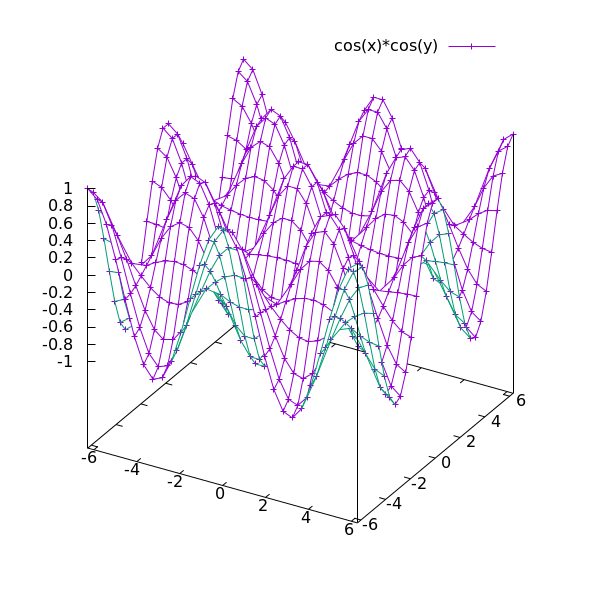

In [1]:
require 'gnuplotrb'
include GnuplotRB

include Math
double_pi = PI * 2

plot3d = Splot.new(
  'cos(x)*cos(y)',
  xrange: -double_pi..double_pi,
  yrange: -double_pi..double_pi,
  style: 'function linespoints',
  hidden3d: true,
  isosample: 30,
  term: ['pngcairo', size: [600, 600]]
)

#### Plot surface from given points

Gnuplot also may plot surfaces given as data arrays. 
Options 'dgrid3d' is necessary here to make surface smooth. It takes field size (some kind of 'isosamples') and interpolation options.

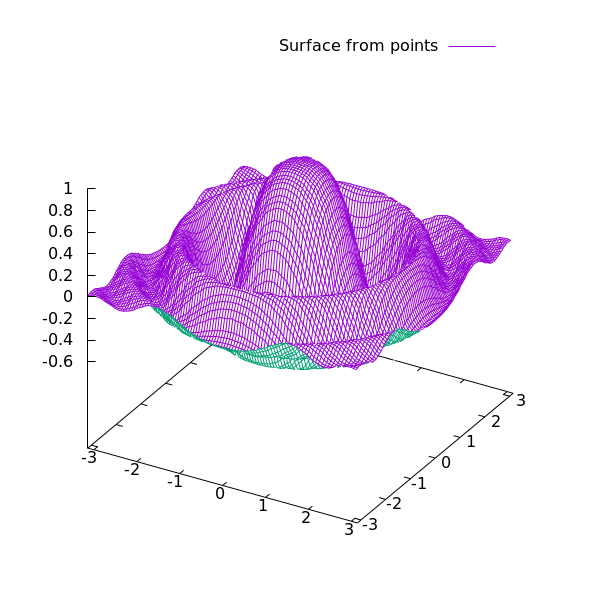

In [2]:
def z_function(x, y)
  arg = x ** 2 + y ** 2
  cos(arg) * exp(-arg/5.0)
end

initial = (-PI..PI).step(0.05).to_a
x = initial * initial.size
y = initial.map { |el| [el] * initial.size }.flatten
z = x.map.with_index { |val, index| z_function(val, y[index]) }

plot3d_points = Splot.new(
  [[x,y,z], title: 'Surface from points'],
  dgrid3d: [100, qnorm: 8],
  style: 'data lines',
  hidden3d: true,
  xrange: -PI..PI,
  yrange: -PI..PI,
  term: ['pngcairo', size: [600, 600]]
)